<a href="https://colab.research.google.com/github/jadams156530/CS4410/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample size:
 569
Feature size:
 30
Target size:
 569
Training set size:
 455
Testing set size:
 114
Model score:
 0.9736842105263158
Confusion Matrix:
 [[40  3]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



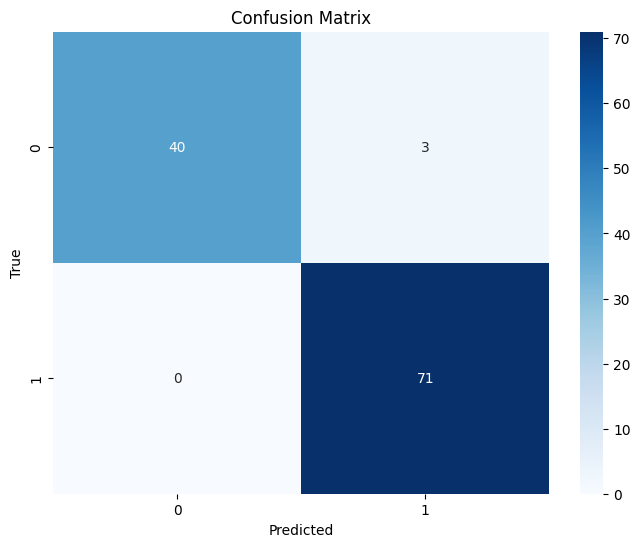

Cross-Validation Scores:
 [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean Cross-Validation Score:
 0.9384711779448622
GaussianNB model score:
 0.9736842105263158
KNeighborsClassifier model score:
 0.956140350877193
LogisticRegression model score:
 0.956140350877193
SVC model score:
 0.9473684210526315


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Checking Sample and Target Sizes
print("Sample size:\n", X.shape[0])
print("Feature size:\n", X.shape[1])
print("Target size:\n", y.shape[0])

# Splitting the Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and Testing Set Sizes
print("Training set size:\n", X_train.shape[0])
print("Testing set size:\n", X_test.shape[0])

# Creating the Model
nb = GaussianNB()

# Training the Model
nb.fit(X_train, y_train)

# Prediction
y_pred = nb.predict(X_test)

# Estimator Method Score
print("Model score:\n", nb.score(X_test, y_test))

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# K-Fold Cross-Validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=X, y=y, cv=kfold)
print("Cross-Validation Scores:\n", scores)
print("Mean Cross-Validation Score:\n", scores.mean())

# Running Multiple Models
estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

for name, model in estimators.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} model score:\n {score}")